In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_validate
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_csv('Laptop price.csv')
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Res_Width,Res_Height,Touchscreen,PanelType,SSD(GB),HDD(GB),ClockSpeed(GHz),CPU,GPU,Price
0,Apple,Ultrabook,13.3,8,macOS,1.37,2560,1600,False,IPS Panel Retina Display,128,0,2.3,Intel Core i5,Intel Iris,1339.69
1,Apple,Ultrabook,13.3,8,macOS,1.34,1440,900,False,Unknown,128,0,1.8,Intel Core i5,Intel HD Graphics,898.94
2,HP,Notebook,15.6,8,No OS,1.86,1920,1080,False,Unknown,256,0,2.5,Intel Core i5,Intel HD Graphics,575.00
3,Apple,Ultrabook,15.4,16,macOS,1.83,2880,1800,False,IPS Panel Retina Display,512,0,2.7,Intel Core i7,AMD,2537.45
4,Apple,Ultrabook,13.3,8,macOS,1.37,2560,1600,False,IPS Panel Retina Display,256,0,3.1,Intel Core i5,Intel Iris,1803.60


## DataFrame info

In [3]:
print(pd.concat([df.isnull().sum(), df.dtypes, df.nunique()],axis=1, keys=['Null values', 'Datatype', 'Unique values']))

                 Null values Datatype  Unique values
Company                    0   object             19
TypeName                   0   object              6
Inches                     0  float64             18
Ram                        0    int64              9
OpSys                      0   object              9
Weight                     0  float64            171
Res_Width                  0    int64             13
Res_Height                 0    int64             10
Touchscreen                0     bool              2
PanelType                  0   object              3
SSD(GB)                    0    int64             11
HDD(GB)                    0    int64              7
ClockSpeed(GHz)            0  float64             25
CPU                        0   object              5
GPU                        0   object              6
Price                      0  float64            791


# Encoding

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Company', 'TypeName', 'OpSys', 'PanelType', 'CPU', 'GPU'], dtype='object')

In [5]:
def printUnique(columns:list):
    for col in columns:
        print(f"{col}: {list(df[col].unique())}")

In [6]:
printUnique(categorical_cols)

Company: ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
TypeName: ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation']
OpSys: ['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android', 'Windows 10 S', 'Chrome OS', 'Windows 7']
PanelType: ['IPS Panel Retina Display', 'Unknown', 'IPS Panel']
CPU: ['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Core i3', 'Intel Other']
GPU: ['Intel Iris', 'Intel HD Graphics', 'AMD', 'Nvidia GeForce', 'Nvidia GTX', 'Nvidia Quadro']


### PanelType

In [7]:
df = pd.concat([df.drop('PanelType', axis=1),pd.get_dummies(df['PanelType'], dtype=int, prefix='panel')], axis=1)
df.drop('panel_Unknown', axis=1, inplace=True)
df.head(1)

,Company,TypeName,Inches,Ram,OpSys,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),CPU,GPU,Price,panel_IPS Panel,panel_IPS Panel Retina Display
0,Apple,Ultrabook,13.3,8,macOS,1.37,2560,1600,False,128,0,2.3,Intel Core i5,Intel Iris,1339.69,0,1


### Company & TypeName

In [8]:
df = pd.concat([df.drop('Company', axis=1),pd.get_dummies(df['Company'], dtype=int, prefix='company', drop_first=True)], axis=1)
df = pd.concat([df.drop('TypeName', axis=1),pd.get_dummies(df['TypeName'], dtype=int, prefix='type', drop_first=True)], axis=1)

In [9]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['OpSys', 'CPU', 'GPU'], dtype='object')

### Operating system

In [10]:
df = pd.concat([df.drop('OpSys', axis=1),pd.get_dummies(df['OpSys'], dtype=int, prefix='os')], axis=1)
df.drop('os_No OS', axis=1, inplace=True)
df.head(1)

,Inches,Ram,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),CPU,...,type_Ultrabook,type_Workstation,os_Android,os_Chrome OS,os_Linux,os_Mac OS X,os_Windows 10,os_Windows 10 S,os_Windows 7,os_macOS
0,13.3,8,1.37,2560,1600,False,128,0,2.3,Intel Core i5,...,1,0,0,0,0,0,0,0,0,1


### CPU

In [11]:
df = pd.concat([df.drop('CPU', axis=1),pd.get_dummies(df['CPU'], dtype=int, prefix='cpu')], axis=1)
df.drop('cpu_Intel Other', axis=1, inplace=True)
df.head(1)

,Inches,Ram,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),GPU,...,os_Linux,os_Mac OS X,os_Windows 10,os_Windows 10 S,os_Windows 7,os_macOS,cpu_AMD,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7
0,13.3,8,1.37,2560,1600,False,128,0,2.3,Intel Iris,...,0,0,0,0,0,1,0,0,1,0


### GPU

In [12]:
df = pd.concat([df.drop('GPU', axis=1),pd.get_dummies(df['GPU'], dtype=int, prefix='gpu')], axis=1)
df.drop('gpu_Intel HD Graphics', axis=1, inplace=True)
df.head(1)

,Inches,Ram,Weight,Res_Width,Res_Height,Touchscreen,SSD(GB),HDD(GB),ClockSpeed(GHz),Price,...,os_macOS,cpu_AMD,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,gpu_AMD,gpu_Intel Iris,gpu_Nvidia GTX,gpu_Nvidia GeForce,gpu_Nvidia Quadro
0,13.3,8,1.37,2560,1600,False,128,0,2.3,1339.69,...,1,0,0,1,0,0,1,0,0,0


# After Encoding

In [13]:
df.select_dtypes(include=object).columns

Index([], dtype='object')

In [14]:
df.shape

(1273, 52)

In [15]:
df.isna().any().value_counts()

False    52
Name: count, dtype: int64

# Visualization

In [16]:
def setGraphBG(title=False, xlabel=False, ylabel=False, xtick_angle=0, verbose=False):
   ax = plt.gca()
   ax.set_facecolor('#eff6ff')
   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['bottom'].set_visible(False)

   if title: plt.title(title,fontsize=20)
   plt.xlabel(xlabel,fontsize=16) if xlabel else plt.xlabel('')
   plt.ylabel(ylabel,fontsize=16) if ylabel else plt.ylabel('')
   plt.xticks(rotation=xtick_angle, fontsize=13)

   if verbose:
      for p in ax.patches:
         ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Correlation

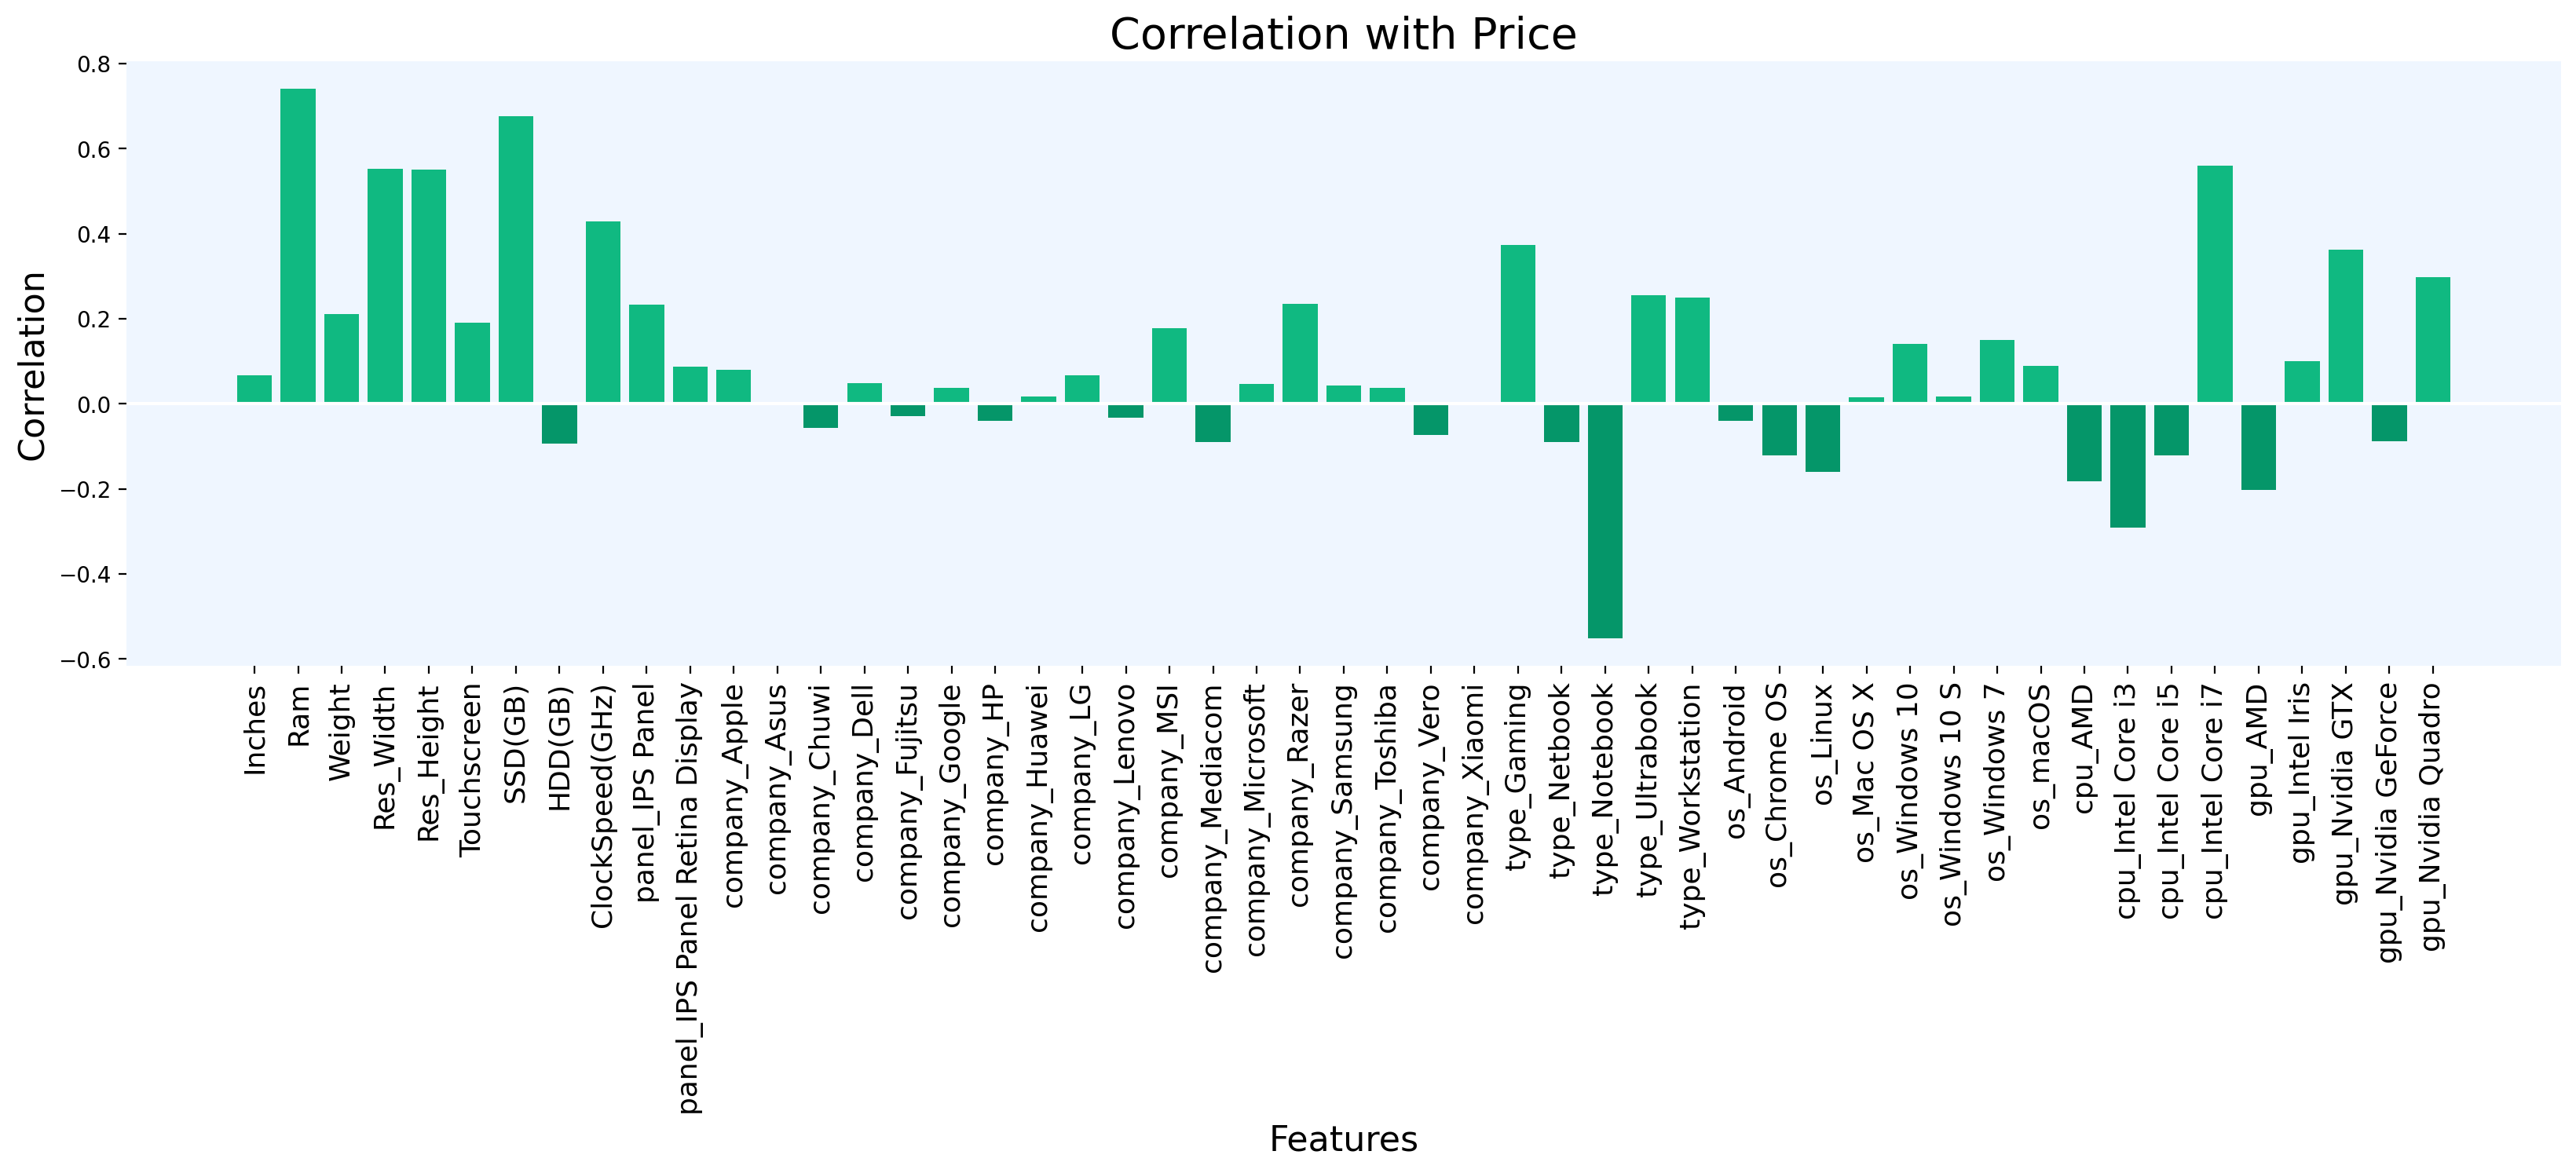

In [17]:
plt.figure(figsize=(20,5), dpi=200)
cor_df = df.corr()['Price']
cor_df.pop('Price')
colors = ['#10b981' if corr > 0 else '#059669' for corr in cor_df]
plt.bar(cor_df.index, cor_df, color=colors)
setGraphBG(title='Correlation with Price', xlabel='Features', ylabel='Correlation', xtick_angle=90)
plt.axhline(y=0, color='white')

## Train & Test Data

In [18]:
x = df.drop('Price', axis=1)
y = df['Price']

In [19]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=38)

# Model Training

In [20]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
traing_scores = []
testing_scores = []

## Linear Regression

In [21]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [22]:
reg_score = reg.score(xtest,ytest)
print(reg_score)
testing_scores.append(reg_score)
traing_scores.append(reg.score(xtrain,ytrain))

0.7903518880700895


## Decision Tree

In [23]:
dt = DecisionTreeRegressor(random_state=92, max_depth=15, max_features=25, min_samples_leaf=2, max_leaf_nodes=63)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=15, max_features=25, max_leaf_nodes=63,
                      min_samples_leaf=2, random_state=92)

In [24]:
dt_score = dt.score(xtest,ytest)
print(dt_score)
testing_scores.append(dt_score)
traing_scores.append(dt.score(xtrain,ytrain))

0.8062541281121012


## K-nearest neighbors (KNN)

In [25]:
knn = KNeighborsRegressor(n_jobs=-1, p=1)
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_jobs=-1, p=1)

In [26]:
knn_score = knn.score(xtest,ytest)
print(knn_score)
testing_scores.append(knn_score)
traing_scores.append(knn.score(xtrain,ytrain))

0.7687117165635353


## Random Forest

In [27]:
# RandomForestRegressor(n_jobs=-1, random_state=48, max_depth=21) MinMax(68)
rf = RandomForestRegressor(n_jobs=-1, random_state=95, max_depth=20, n_estimators=60, max_features=12)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=20, max_features=12, n_estimators=60, n_jobs=-1,
                      random_state=95)

In [28]:
rf_score = rf.score(xtest,ytest)
print(rf_score)
testing_scores.append(rf_score)
traing_scores.append(rf.score(xtrain,ytrain))

0.8761574251352678


# Comparision

In [29]:
df_score = pd.DataFrame({'Model': model_names,'Training score':traing_scores,'Testing score':testing_scores})
df_score = pd.melt(df_score, id_vars=['Model'], var_name='Score Type', value_name='Accuracy')
df_score

,Model,Score Type,Accuracy
0,Logistic Regression,Training score,0.803683
1,Decision Tree,Training score,0.867849
2,KNN,Training score,0.806361
3,Random Forest,Training score,0.972514
4,Logistic Regression,Testing score,0.790352
5,Decision Tree,Testing score,0.806254
6,KNN,Testing score,0.768712
7,Random Forest,Testing score,0.876157


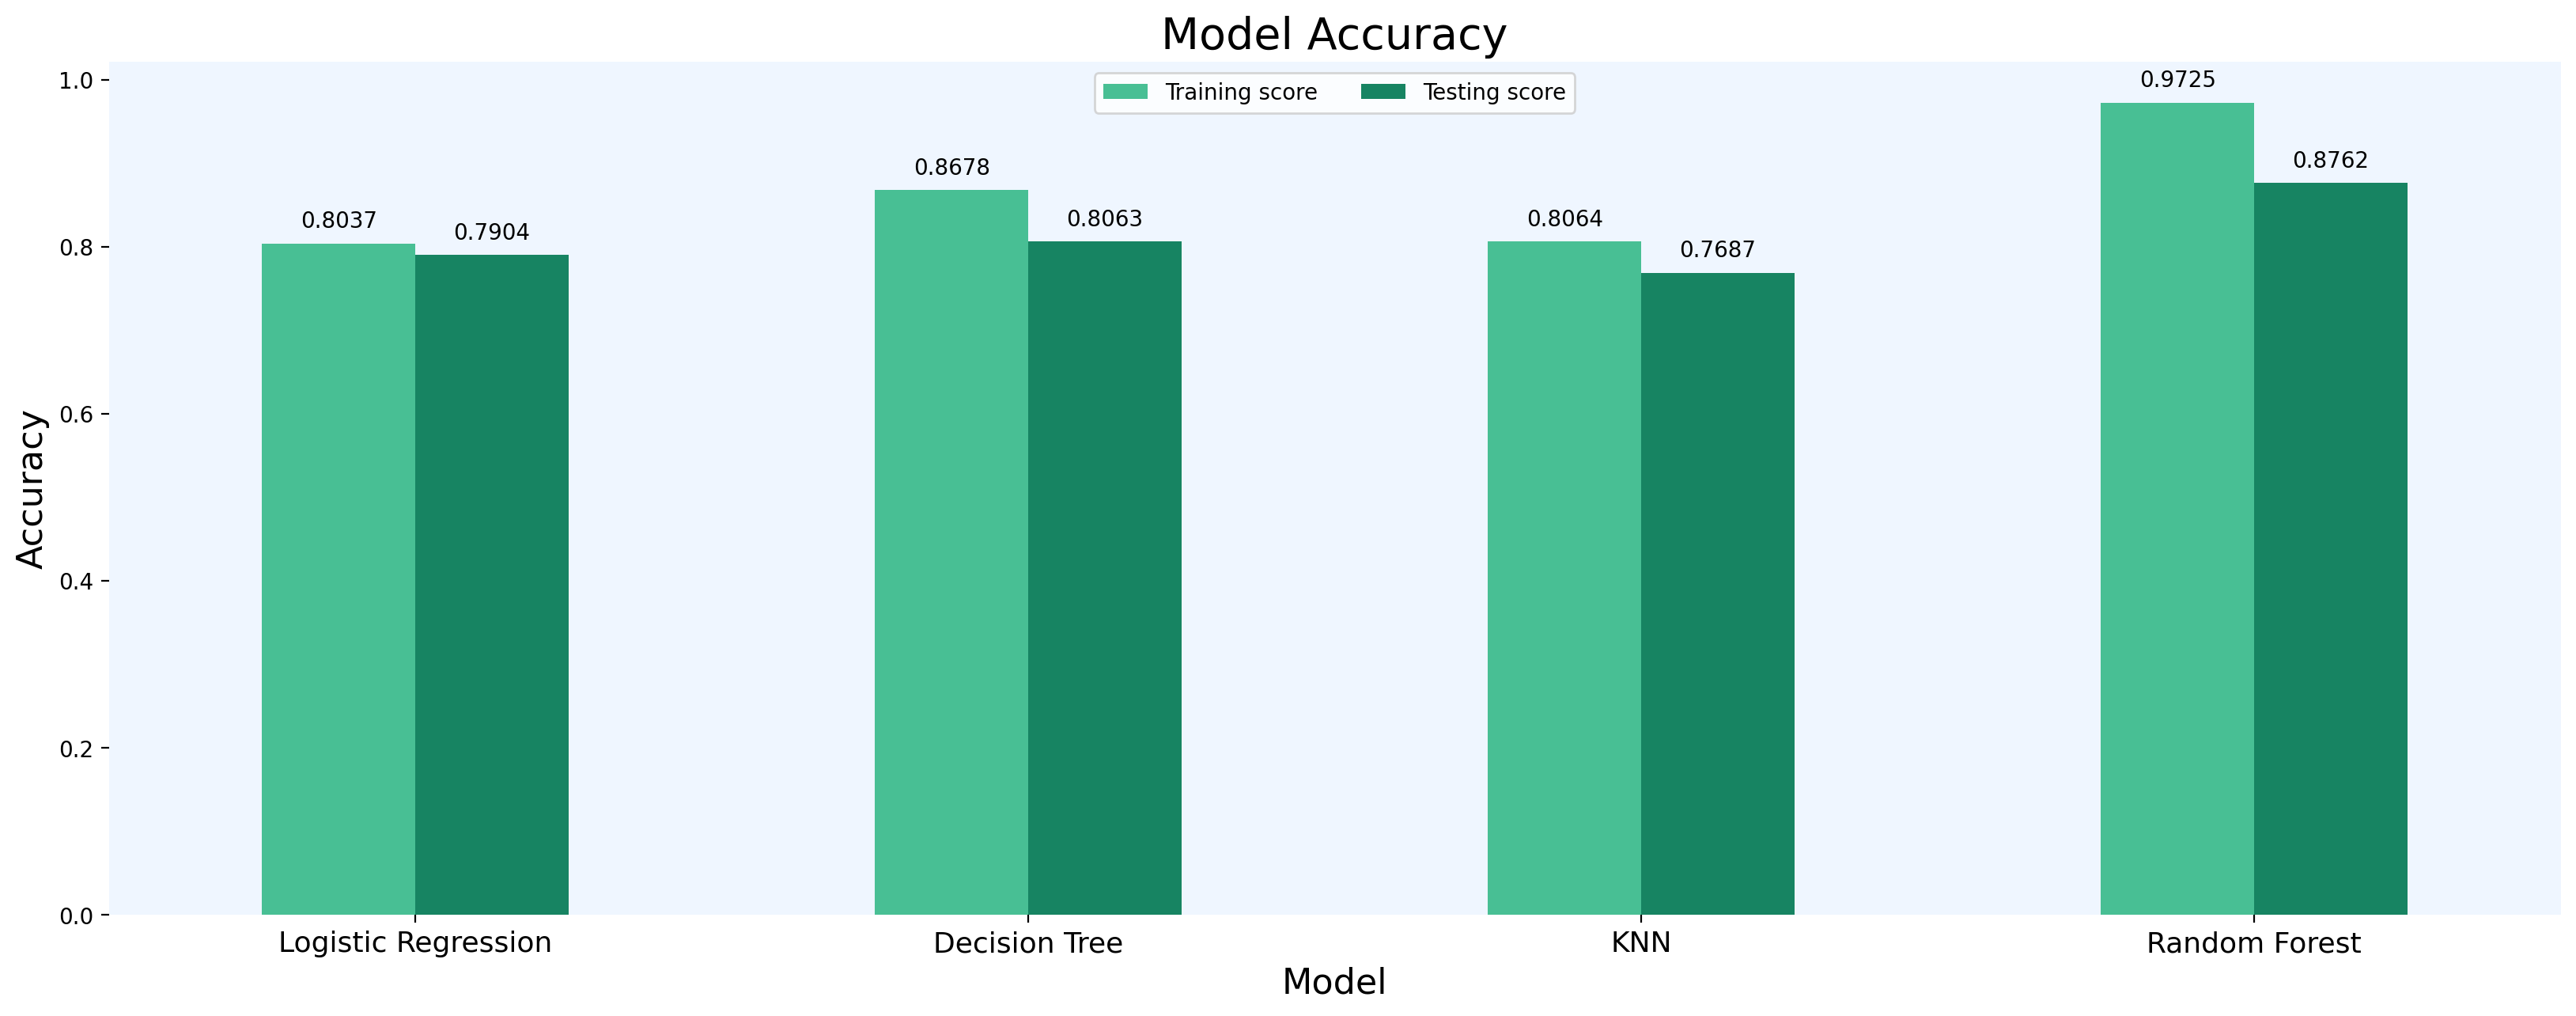

In [30]:
plt.figure(figsize=(20,7), dpi=200)
sns.barplot(data=df_score, x='Model', y='Accuracy', hue='Score Type', width=0.5, palette=['#34d399', '#059669'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)
setGraphBG(title='Model Accuracy', xlabel='Model', ylabel='Accuracy', verbose=True)


# Feature Importance

In [31]:
Feature_df = pd.concat([
    pd.DataFrame(x.columns, columns=['Feature name']),
    pd.DataFrame(rf.feature_importances_, columns=['Feature Importance']),
], axis=1)
Top20 = Feature_df.nlargest(20, 'Feature Importance')

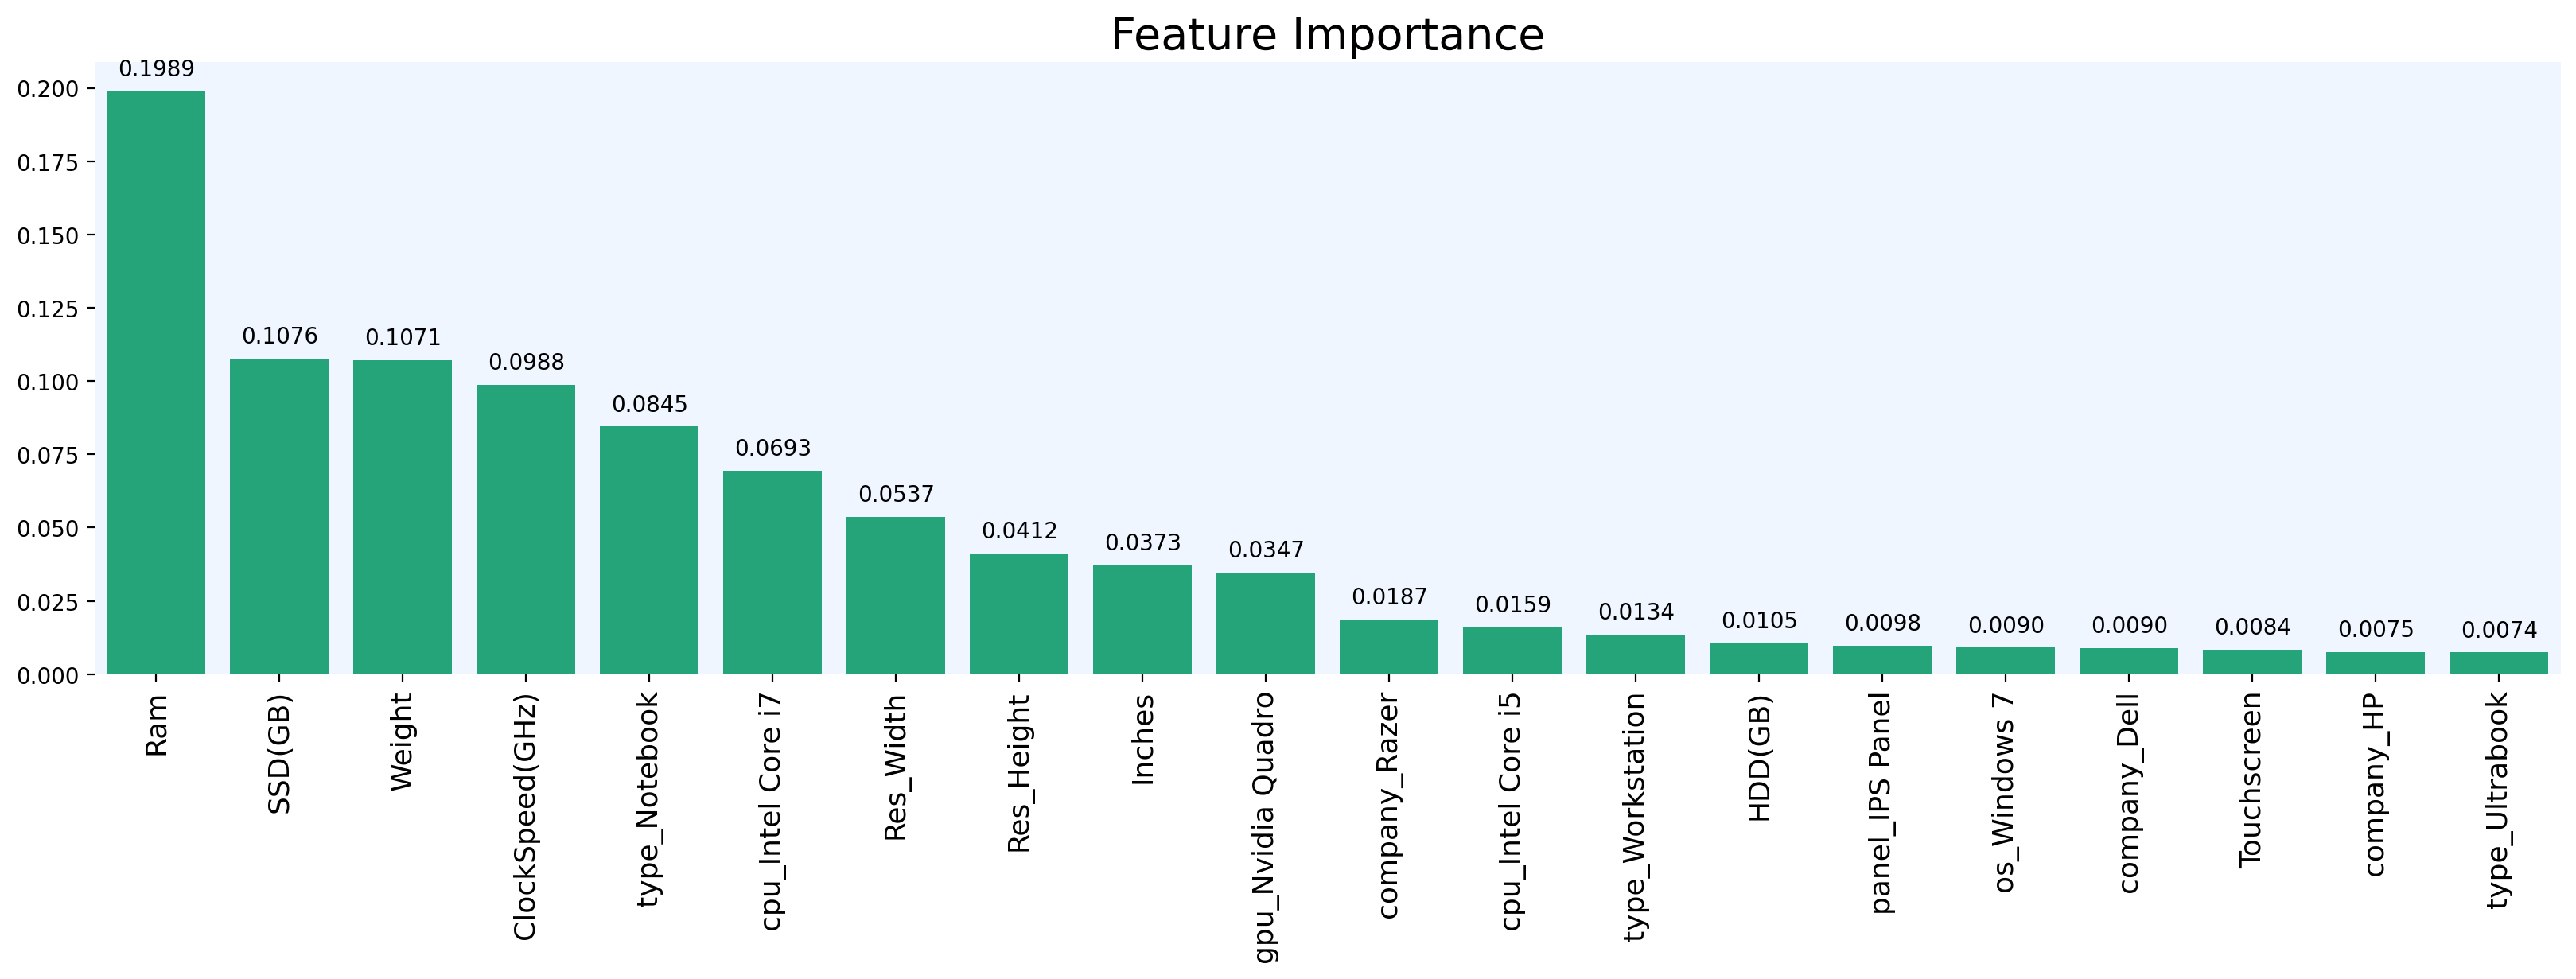

In [32]:
plt.figure(figsize=(20,5), dpi=200)
sns.barplot(data=Top20, x='Feature name', y='Feature Importance', color='#10b981')
setGraphBG(title='Feature Importance', xtick_angle=90, verbose=True)

# K-Fold Cross Validation

In [33]:
kf_scores = cross_validate(rf, x, y, cv=KFold(n_splits=10), scoring='r2')
cv_scores = kf_scores['test_score']

In [34]:
print(f"Min score: {cv_scores.min()}")
print(f"Max score: {cv_scores.max()}")
print(f"Mean score: {cv_scores.mean()}")

Min score: 0.7066159876706319
Max score: 0.9081108366754579
Mean score: 0.8329124923059451
